1. Read data from hand written digit data set.Apply SVM on it and analyse the data.Observe the accuracy of the model with different kernels. Then predict the digits from the images of hand written digits.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [13]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
len(digits.feature_names)

64

In [9]:
digits.frame

In [10]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

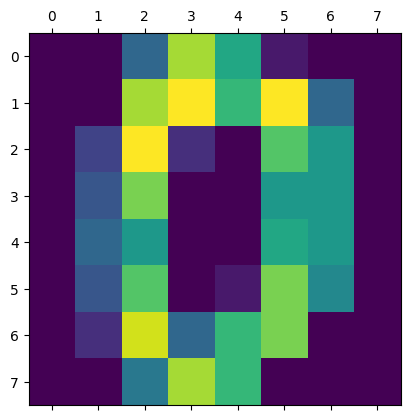

In [15]:
plt.matshow(digits.images[0])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2,random_state=42)

In [18]:
model = SVC() # C =1.0,kernel= 'rbf',gamma ='scale'
model.fit(x_train,y_train)

SVC()

In [19]:
model.score(x_test,y_test)

0.9861111111111112

In [20]:
model_1 = SVC(kernel='linear') # C =1.0,kernel= 'linear',gamma ='scale'
model_1.fit(x_train,y_train)
model_1.score(x_test,y_test)

0.9777777777777777

In [21]:
model_2 = SVC(kernel='sigmoid') # C =1.0,kernel= 'sigmoid',gamma ='scale'
model_2.fit(x_train,y_train)
model_2.score(x_test,y_test)

0.9

In [22]:
model_3 = SVC(kernel='poly') # C =1.0,kernel= 'poly',gamma ='scale'
model_3.fit(x_train,y_train)
model_3.score(x_test,y_test)

0.9916666666666667

In [23]:
model_4 = SVC(kernel='poly',gamma='auto') # C =1.0,kernel= 'poly',gamma ='auto'
model_4.fit(x_train,y_train)
model_4.score(x_test,y_test)

0.9861111111111112

In [29]:
# take a sample from test data - take 100th row
x_test[100]

array([ 0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        5.,  0.,  0.,  0.,  0.,  1., 16., 16.,  5.,  0.,  0.,  0.,  0.,
       11., 16., 16.,  1.,  1.,  0.,  0.,  6., 16., 16., 16., 15.,  9.,
        0.,  0.,  7., 15., 16., 16., 10.,  1.,  0.,  0.,  0.,  1.,  7.,
       16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,  0.,  0.])

In [27]:
model_3.predict([x_test[100]])

array([4])

In [28]:
y_test[100]

4

In [30]:
# another way to prediction the digit
# directly from digits data set
digits.data[67]

array([ 0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,
        0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
       16.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,  7.,  4.,  0.,
        0.,  0.,  3., 16., 16., 16., 16.,  9.,  0.,  0.,  0., 15., 15.,
        4., 10., 16.,  0.,  0.,  0.,  4., 14., 16., 12.,  7.,  0.])

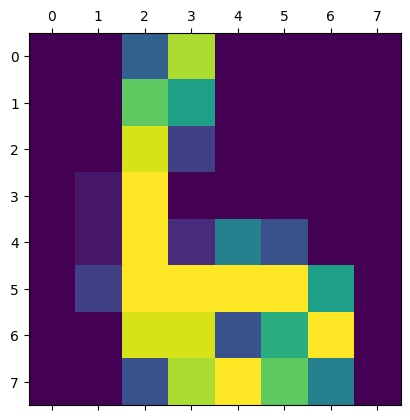

In [32]:
plt.matshow(digits.images[67])

In [34]:
model_3.predict([digits.data[67]])

array([6])

In [35]:
digits.target[67]

6